In [ ]:
#Install libraries
!pip install scikit-learn xgboost lightgbm catboost

In [ ]:
# ============================================
# 1. Import library
# ============================================
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

# Base models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

# Explainability
from sklearn.inspection import permutation_importance
import shap
import matplotlib.pyplot as plt
import kagglehub

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/breast-cancer-wisconsin-data")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'breast-cancer-wisconsin-data' dataset.
Path to dataset files: /kaggle/input/breast-cancer-wisconsin-data


In [ ]:
df = pd.read_csv(f"{path}/data.csv")

# Cek kolom untuk memastikan
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id – Nomor identifikasi sampel  
diagnosis – Jenis kanker (M = Malignant, B = Benign)  
radius_mean – Rata-rata jarak dari pusat ke batas inti  
texture_mean – Variasi tingkat keabuan  
perimeter_mean – Rata-rata keliling inti  
area_mean – Rata-rata luas inti  
smoothness_mean – Kekasaran permukaan inti  
compactness_mean – Kepadatan bentuk inti  
concavity_mean – Tingkat cekungan inti  
concave points_mean – Jumlah titik cekung  
symmetry_mean – Tingkat simetri bentuk inti  
fractal_dimension_mean – Kompleksitas bentuk inti  
radius_se – Standar error radius  
texture_se – Standar error tekstur  
perimeter_se – Standar error keliling  
area_se – Standar error area  
smoothness_se – Standar error kekasaran  
compactness_se – Standar error kepadatan  
concavity_se – Standar error cekungan  
concave points_se – Standar error titik cekung  
symmetry_se – Standar error simetri  
fractal_dimension_se – Standar error kompleksitas bentuk  
radius_worst – Nilai radius maksimum  
texture_worst – Nilai tekstur maksimum  
perimeter_worst – Nilai keliling maksimum  
area_worst – Nilai area maksimum  
smoothness_worst – Nilai kekasaran maksimum  
compactness_worst – Nilai kepadatan maksimum  
concavity_worst – Nilai cekungan maksimum  
concave points_worst – Nilai titik cekung maksimum  
symmetry_worst – Nilai simetri maksimum  
fractal_dimension_worst – Nilai kompleksitas maksimum  
Unnamed: 32 – Kolom kosong, tidak digunakan


In [ ]:
# set index untuk id
df = df.set_index('id')

# Hapus kolom kosong jika ada
df = df.drop(columns=['Unnamed: 32'], errors='ignore')
# Label target: konversi 'diagnosis' (M = malignant, B = benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Pisahkan fitur dan target
df_X = df.drop(columns=['diagnosis'])
df_y = df[['diagnosis']]

# ============================================
# 5. Split data menjadi train dan test
# ============================================
X_train, X_test, y_train, y_test = train_test_split(
    df_X, df_y, test_size=0.2, random_state=42
)

In [ ]:
y_train.value_counts()

diagnosis
0            286
1            169
Name: count, dtype: int64

## Function for Evaluate Modelling
1. evaluate model using Recall or Precision.
- Dalam konteks deteksi kanker, kesalahan memiliki konsekuensi berbeda:
- FN erat dengan recall dan FP erat dengan Precision
- False Negative (FN): pasien punya kanker tapi model bilang tidak. Sangat berbahaya — pasien bisa kehilangan kesempatan deteksi dini.

- False Positive (FP): pasien tidak punya kanker tapi model bilang punya. Masih bisa ditangani dengan pemeriksaan lanjutan.

Karena itu, tujuan utama adalah meminimalkan FN, dan metrik yang mengukur hal itu adalah Recall

In [ ]:
def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    y_train_pred = classifier.predict(X_train)
    y_test_pred = classifier.predict(X_test)
    # on training
    recall_train = recall_score(y_train, y_train_pred)
    # on testing dataset
    recall_test = recall_score(y_test, y_test_pred)

    print(f'Training Recall: {recall_train:.3f}')
    print(f'Test Recall: {recall_test:.3f}')
    print("\nClassification Report (Test):")
    print(classification_report(y_test, y_test_pred))

    return recall_train, recall_test

# Voting Classifier

In [ ]:
# ============================================
# 2. Voting Classifier
# ============================================

# Base models
log_clf = LogisticRegression()
rf_clf = RandomForestClassifier()
xgb_clf = XGBClassifier()

# Kombinasi Voting
voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rf_clf), ('xgb', xgb_clf)],
    voting='soft'
)

# training
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 voting='soft')

In [ ]:
print("\n=== Voting Classifier (Soft Voting) ===")
evaluate_model(voting_clf, X_train, y_train, X_test, y_test)


=== Voting Classifier (Soft Voting) ===
Training Recall: 0.994
Test Recall: 0.930

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



(0.9940828402366864, 0.9302325581395349)

## Bagaimana jika Voting Classifier ini kita variasikan dan kita compare ?


In [ ]:
# ============================================
# 2. Ensemble: Voting Classifier (Perbandingan Model)
# ============================================

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Kita akan membuat beberapa kombinasi Voting Classifier
# dengan base models yang berbeda agar bisa dibandingkan.

# --- Kombinasi 1: Model dasar klasik ---
voting_clf1 = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression()),
        ('dt', DecisionTreeClassifier()),
        ('knn', KNeighborsClassifier())
    ],
    voting='soft'
)

# --- Kombinasi 2: Kombinasi pohon keputusan ---
voting_clf2 = VotingClassifier(
    estimators=[
        ('dt', DecisionTreeClassifier()),
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier())
    ],
    voting='soft'
)

# --- Kombinasi 3: Kombinasi model kuat (termasuk boosting) ---
voting_clf3 = VotingClassifier(
    estimators=[
        ('rf', RandomForestClassifier()),
        ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
        ('cat', CatBoostClassifier(verbose=0))
    ],
    voting='soft'
)

In [ ]:

# ============================================
# 3. Latih semua model Voting
# ============================================

voting_models = {
    "Voting Klasik (LR + DT + KNN)": voting_clf1,
    "Voting Pohon (DT + RF + GB)": voting_clf2,
    "Voting Boosting (RF + XGB + CatBoost)": voting_clf3
}

voting_results = []


In [ ]:

for name, model in voting_models.items():
    print(f"\n{name}")
    model.fit(X_train, y_train)
    recall_train, recall_test = evaluate_model(model, X_train, y_train, X_test, y_test)
    voting_results.append({
        "Model": name,
        "Training Recall": recall_train,
        "Test Recall": recall_test
    })


Voting Klasik (LR + DT + KNN)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear

Training Recall: 0.953
Test Recall: 0.930

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        71
           1       1.00      0.93      0.96        43

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114


Voting Pohon (DT + RF + GB)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


Training Recall: 1.000
Test Recall: 0.930

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114


Voting Boosting (RF + XGB + CatBoost)


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:93: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [19:13:48] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training Recall: 1.000
Test Recall: 0.930

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        71
           1       0.95      0.93      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [ ]:
# ============================================
# 4. Tampilkan hasil perbandingan performa
# ============================================
voting_df = pd.DataFrame(voting_results).sort_values(by="Test Recall", ascending=False).reset_index(drop=True)
voting_df["Gap (Train-Test)"] = voting_df["Training Recall"] - voting_df["Test Recall"]

print("\n=== Perbandingan Voting Classifier ===")
print(voting_df)


=== Perbandingan Voting Classifier ===
                                   Model  Training Recall  Test Recall  \
0          Voting Klasik (LR + DT + KNN)         0.952663     0.930233   
1            Voting Pohon (DT + RF + GB)         1.000000     0.930233   
2  Voting Boosting (RF + XGB + CatBoost)         1.000000     0.930233   

   Gap (Train-Test)  
0          0.022430  
1          0.069767  
2          0.069767  


# Explainable AI

## Model-Agnostic Explainability (SHAP)


In [ ]:
# ============================================
# Explainable AI using SHAP (with Breast Cancer Dataset)
# ============================================

# 1. Import libraries
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_breast_cancer

# Optional: make plots display nicely
shap.initjs()

print("Data loaded successfully.")
print(f"Train shape: {X_train.shape}, Test shape: {X_test.shape}")

Data loaded successfully.
Train shape: (455, 30), Test shape: (114, 30)


In [ ]:
# ============================================
# 3. Train Random Forest Classifier : Bagging
# ============================================
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
print("Random Forest model trained successfully!")

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest model trained successfully!


In [ ]:

# ============================================
# 4. Create SHAP Explainer & Compute SHAP Values
# ============================================
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test)

print("SHAP values computed!")
print(f"SHAP value array shape (class 1): {np.array(shap_values[1]).shape}")

SHAP values computed!
SHAP value array shape (class 1): (30, 2)


SHAP values (class 1) shape: (114, 30)
X_test shape: (114, 30)


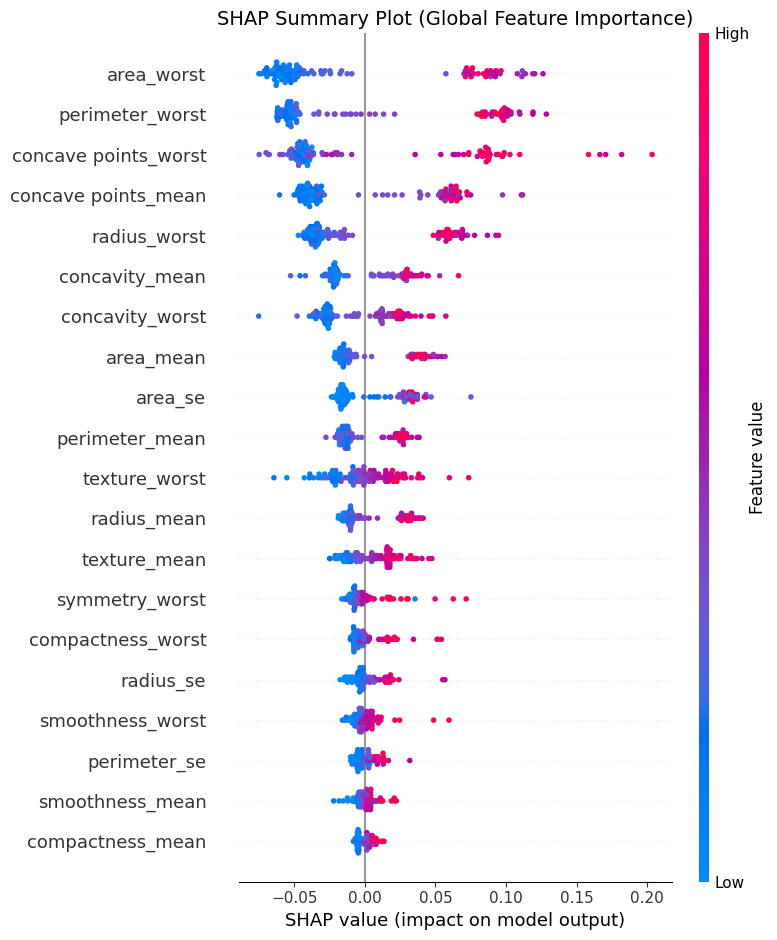

<Figure size 640x480 with 0 Axes>

In [ ]:
# Ambil hanya SHAP values untuk kelas positif (1)
shap_values_class1 = shap_values[..., 1]  # (114, 30)

print("SHAP values (class 1) shape:", shap_values_class1.shape)
print("X_test shape:", X_test.shape)

# ============================================
# Visualisasi: SHAP Summary Plot (Global)
# ============================================
plt.figure(figsize=(10, 6))
plt.title("SHAP Summary Plot (Global Feature Importance)", fontsize=14)
shap.summary_plot(shap_values_class1, X_test)
plt.tight_layout()
plt.show()


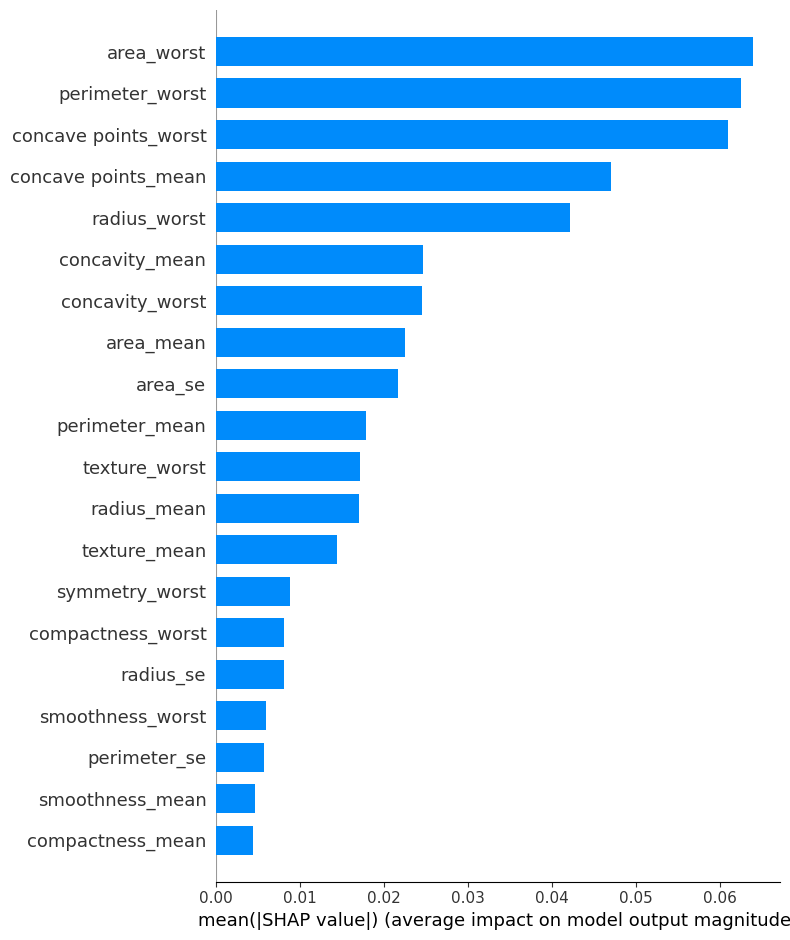

In [ ]:
shap.summary_plot(shap_values[..., 1], X_test, plot_type="bar")

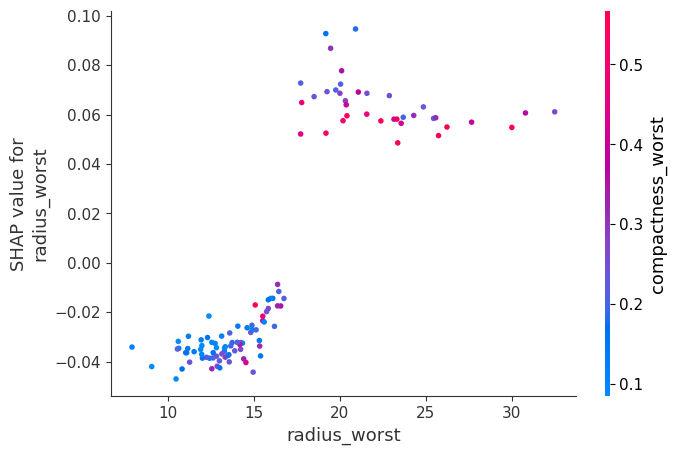

In [ ]:

# Explanation:
# - Each dot represents one prediction.
# - The color shows feature value (red = high, blue = low).
# - The x-axis shows SHAP value (impact on prediction).

# ============================================
# 6. SHAP Dependence Plot (Feature Relationship)
# ============================================
shap.dependence_plot('radius_worst', shap_values[..., 1], X_test)

## Model-Agnostic Explainability dengan LIME

LIME Tidak Dirancang untuk "Global Explanation"

Konsep dasar LIME:

- Membuat model lokal linear di sekitar satu instance tertentu.

- Tujuan: menjelaskan mengapa prediksi untuk instance ini seperti itu.

- Kalau kamu jalankan untuk semua data:

- Kamu akan punya ratusan model lokal berbeda-beda.

- Setiap model hanya relevan untuk instance-nya sendiri.

- Tidak bisa langsung digabung untuk membuat kesimpulan umum.

In [ ]:
!pip install lime

In [ ]:
# ============================================
# 1. Import LIME dan setup
# ============================================
import lime
import lime.lime_tabular

# Ambil model voting yang sudah dilatih
lime_model = voting_models["Voting Pohon (DT + RF + GB)"]
lime_model.fit(X_train, y_train.values.ravel())

# Inisialisasi LIME Explainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=X_train.values,
    feature_names=X_train.columns,
    class_names=['Benign', 'Malignant'],
    mode='classification'
)

# ============================================
# 2. Pilih satu sampel untuk dijelaskan
# ============================================
sample_idx = 25
sample_data = X_train.iloc[sample_idx].values.reshape(1, -1)
sample_pred = lime_model.predict(sample_data)
sample_class = 'Malignant' if sample_pred[0] == 1 else 'Benign'

print(f"Model Prediction: {sample_class}")

Model Prediction: Malignant


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


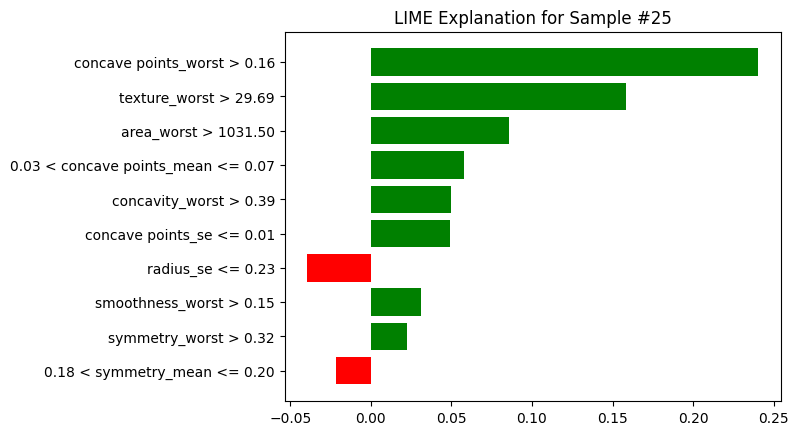

In [ ]:

# ============================================
# 3. Lakukan penjelasan lokal (LIME)
# ============================================
exp = explainer.explain_instance(
    data_row=X_train.iloc[sample_idx].values,
    predict_fn=lime_model.predict_proba
)

# Visualisasi penjelasan
exp.show_in_notebook(show_table=True)

# Jika ingin lihat di matplotlib
fig = exp.as_pyplot_figure()
plt.title(f"LIME Explanation for Sample #{sample_idx}")
plt.show()


## Mini tugas, jelaskan interpretasi dari hasil Global Summary dibawah :
Notes : walaupun LIME tidak cocok untuk Global Summary.

In [ ]:
# # ============================================================
# # GLOBAL SUMMARY (Aggregated from All LIME Explanations)
# # ============================================================

# import numpy as np
# import matplotlib.pyplot as plt
# import pandas as pd
# from collections import defaultdict

# # 1. Kumpulkan semua kontribusi fitur dari setiap instance
# feature_contributions = defaultdict(list)

# for exp in explanations:
#     for feat, val in exp.as_list():
#         feature_contributions[feat].append(val)

# # 2. Hitung rata-rata absolut kontribusi untuk tiap fitur
# avg_contributions = {
#     feat: np.mean(np.abs(vals)) for feat, vals in feature_contributions.items()
# }

# # 3. Urutkan berdasarkan rata-rata kontribusi terbesar
# avg_contributions = dict(sorted(avg_contributions.items(), key=lambda x: x[1], reverse=True))

# # 4. Ubah ke DataFrame untuk kemudahan visualisasi dan analisis
# lime_summary_df = pd.DataFrame({
#     'Feature': list(avg_contributions.keys()),
#     'Avg_Absolute_Contribution': list(avg_contributions.values())
# }).sort_values(by='Avg_Absolute_Contribution', ascending=False)

# print("Top 10 fitur paling berpengaruh (berdasarkan agregasi LIME):")
# display(lime_summary_df.head(10))

In [ ]:

# # ============================================================
# # 5. Visualisasi Global Summary
# # ============================================================

# plt.figure(figsize=(8, 5))
# top_features = lime_summary_df['Feature'].head(10)
# top_values = lime_summary_df['Avg_Absolute_Contribution'].head(10)

# plt.barh(top_features[::-1], top_values[::-1])
# plt.xlabel("Average |Contribution| (LIME values)")
# plt.title("Global Feature Importance (Aggregated from all LIME Explanations)")
# plt.tight_layout()
# plt.show()


# Tree-Based Models

In [ ]:
# ============================================
# 1. Model-Specific Explainability (Tree-Based Models)
# ============================================
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Kita pakai Decision Tree sederhana agar mudah dijelaskan
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_clf.fit(X_train, y_train)

print("\n=== Decision Tree - Model Specific Explanation ===")
evaluate_model(tree_clf, X_train, y_train, X_test, y_test)


=== Decision Tree - Model Specific Explanation ===
Training Recall: 0.959
Test Recall: 0.907

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.95      0.97      0.96        71
           1       0.95      0.91      0.93        43

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



(0.9585798816568047, 0.9069767441860465)

## Model-Specific Explainability (Tree-Based Models)

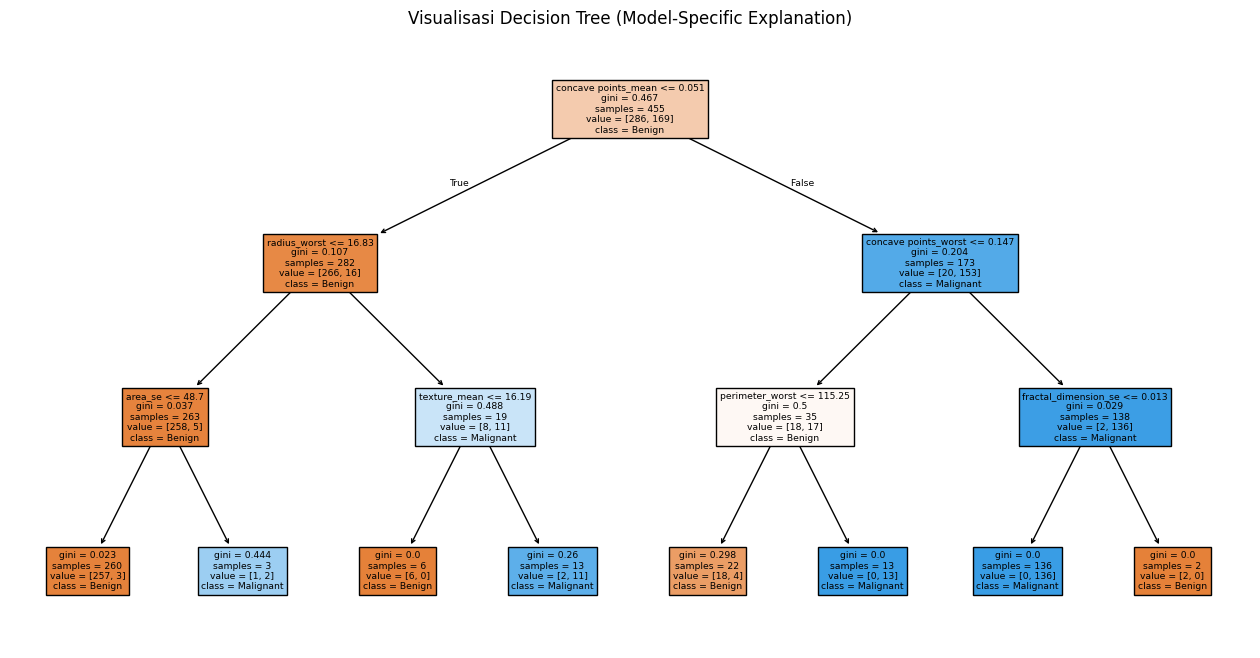

In [ ]:

# Visualisasi struktur pohon
plt.figure(figsize=(16, 8))
plot_tree(tree_clf, feature_names=X_train.columns, class_names=["Benign", "Malignant"], filled=True)
plt.title("Visualisasi Decision Tree (Model-Specific Explanation)")
plt.show()

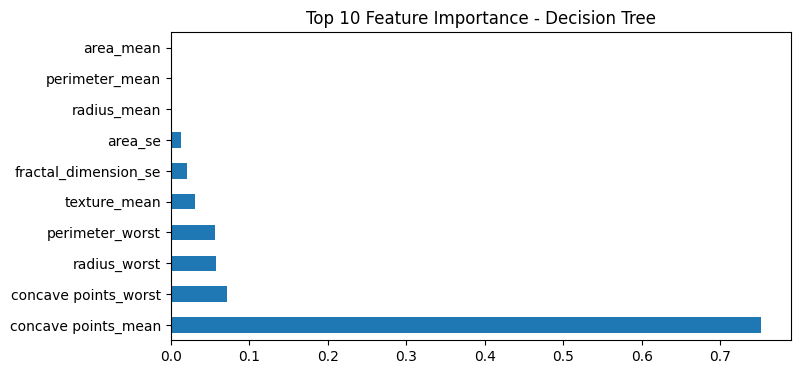

In [ ]:

# Feature importance — fitur paling berpengaruh
importances = pd.Series(tree_clf.feature_importances_, index=X_train.columns)
importances.nlargest(10).plot(kind='barh', figsize=(8, 4))
plt.title("Top 10 Feature Importance - Decision Tree")
plt.show()